In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing 

In [2]:
# Load the Data 
data = fetch_california_housing(as_frame = True)
df = data.frame

# Dataset Overview 

In [11]:
# print(df.columns)
# print(df.shape) 
print(df.head()) 
df.info()
df.describe() 


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Column Meaning (with unit interpretation) 
### MedInc: Median income in tens of thousands of USD \
### HouseAge: Median house age in years \
### AveRooms: Average number of rooms per household \
### AveBedrms: Average bedrooms per household \
### Population: Population per block group \
### AveOccup: Average household occupancy \
### Latitude: Degrees \
### Longitude: Degrees \
### MedHouseVal: Median house value in hundreds of thousands USD


# Data Distribution 

In [41]:
# Identify target and features 
target = 'MedHouseVal' 
features = df.drop(columns = target).columns
# print(features)

8

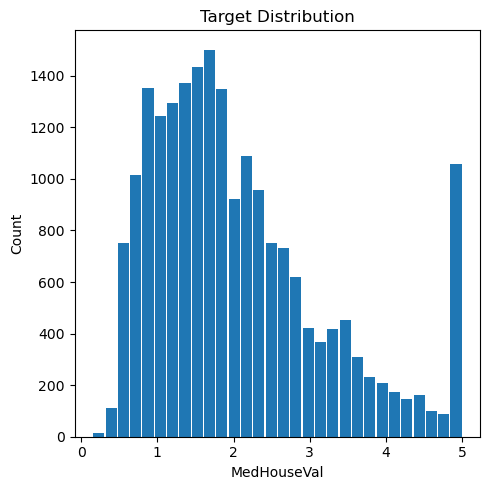

In [20]:
# Target distribution
fig, ax = plt.subplots(figsize = (5,5)) 
ax.hist(df[target], bins = 30, rwidth = 0.9) 
ax.set_xlabel(target) 
ax.set_ylabel("Count") 
ax.set_title("Target Distribution") 
plt.tight_layout() 
plt.show() 

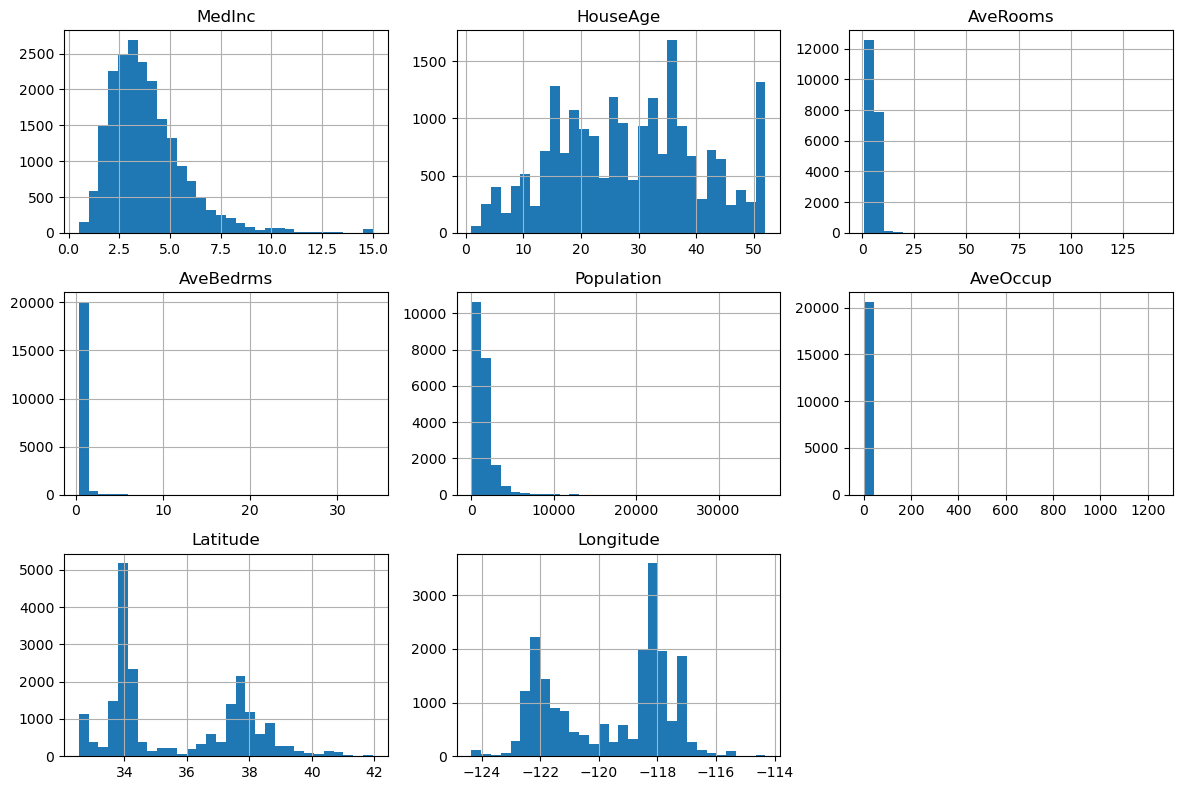

In [23]:
# Feature distribution 
df[features].hist(bins = 30, figsize = (12, 8)) 
plt.tight_layout() 
plt.show() 

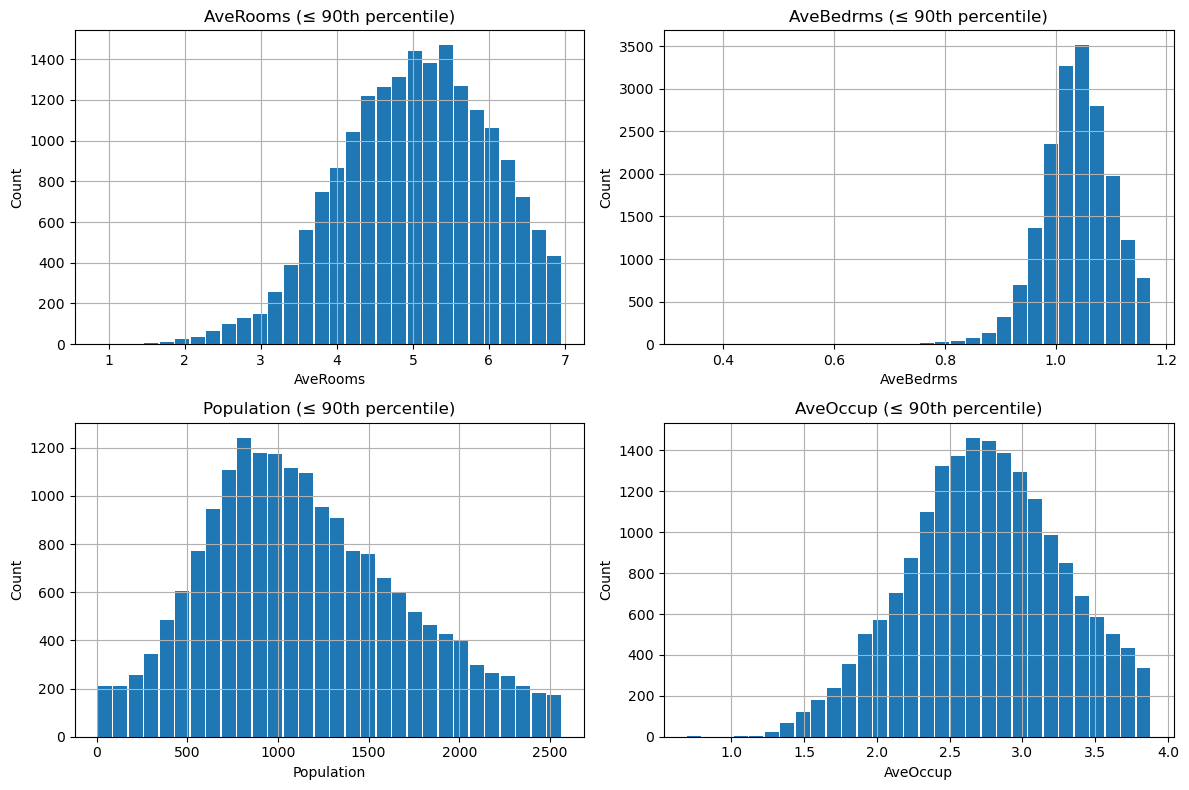

In [49]:
cols = ["AveRooms", "AveBedrms", "Population", "AveOccup"] 

fig, axes = plt.subplots(2, 2, figsize = (12, 8)) 
axes = axes.flatten() 

for ax, col in zip(axes, cols):
    q90 = df[col].quantile(0.90) 
    data_90 =  df.loc[df[col] <= q90, col]

    ax.hist(data_90, bins = 30, rwidth = 0.9) 
    ax.set_title(f"{col} (≤ 90th percentile)") 
    ax.set_xlabel(col) 
    ax.set_ylabel("Count") 
    ax.grid()

plt.tight_layout() 
plt.show() 
    

# Exploring Boxplots and Removing Outliers

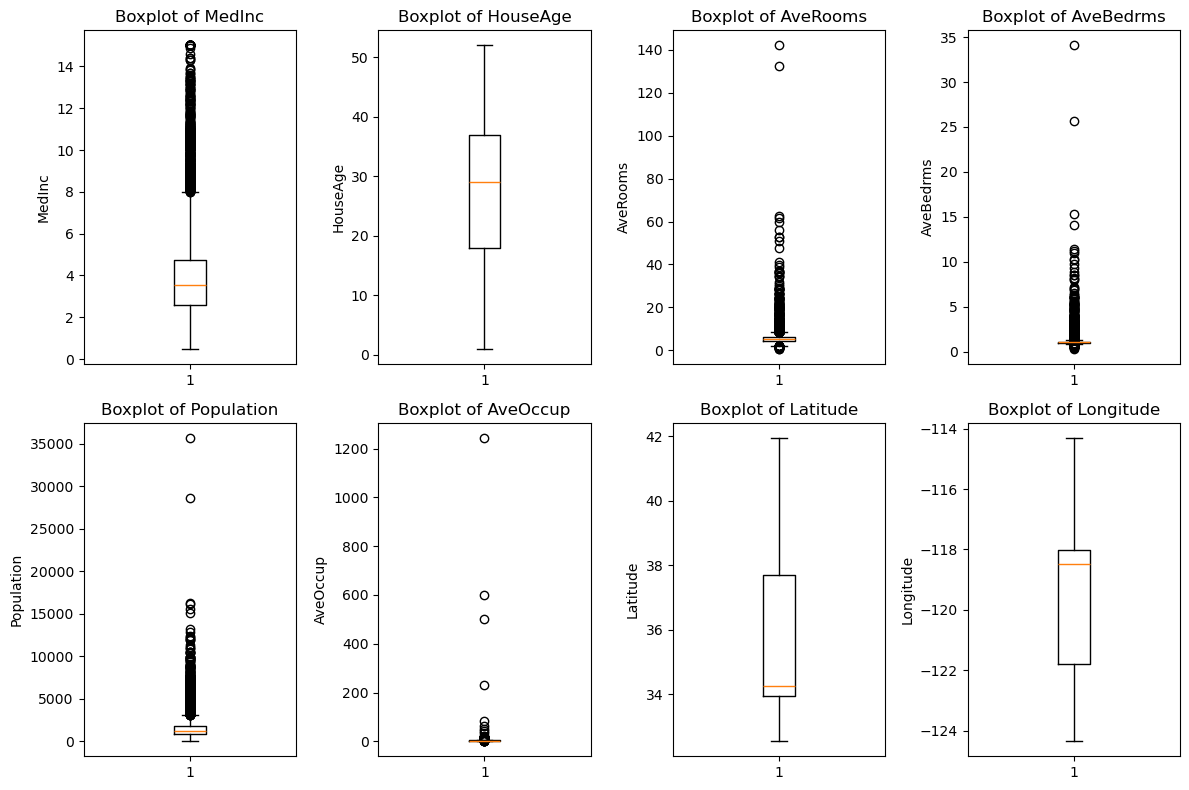

In [104]:
# ax = df.boxplot(by = features, column = target) 
# ax.set_xlabel('') 
# ax.set_ylabel('') 
# plt.suptitle('') 

fig, axes = plt.subplots(2, 4, figsize = (12, 8)) 
axes = axes.flatten() 
for ax, col in zip(axes, features):
    # plt.figure(figsize=(4, 3))
    ax.boxplot(df[col].dropna(), vert = True)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)
    ax.set_xlabel('') 
    
plt.tight_layout()
plt.show()
 

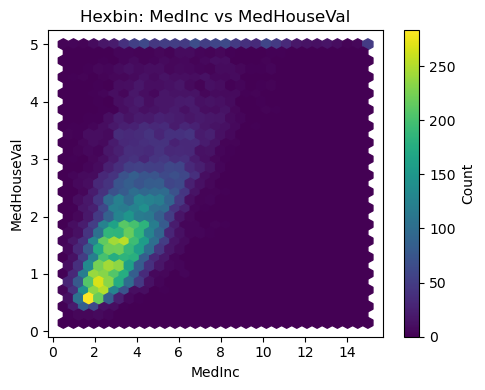

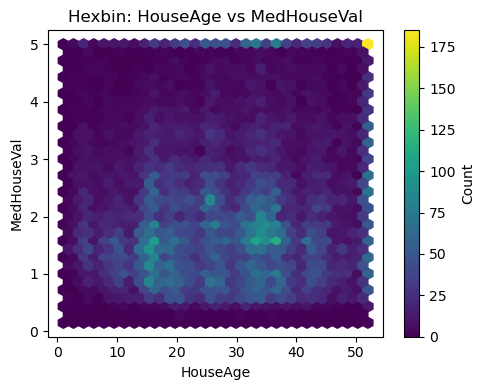

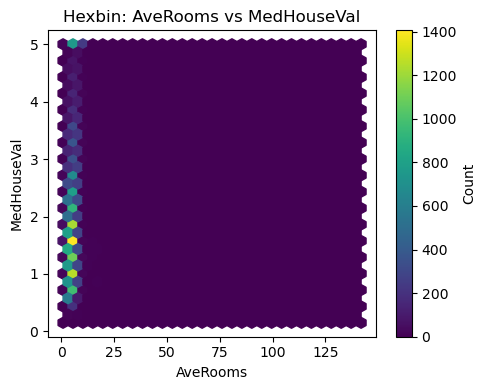

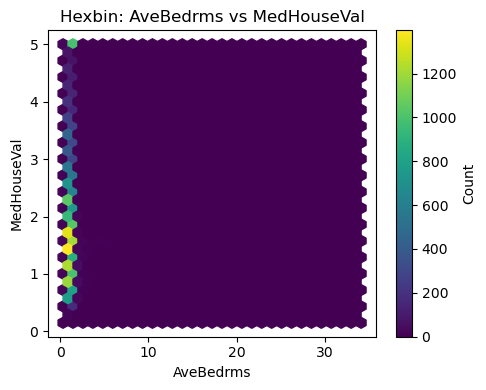

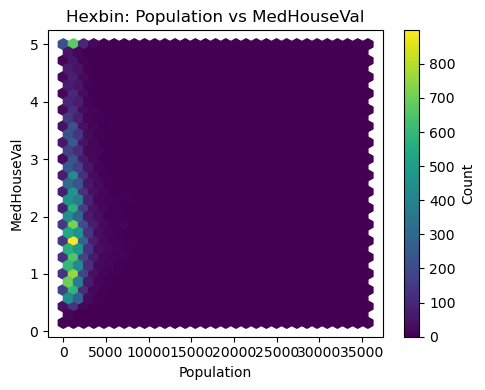

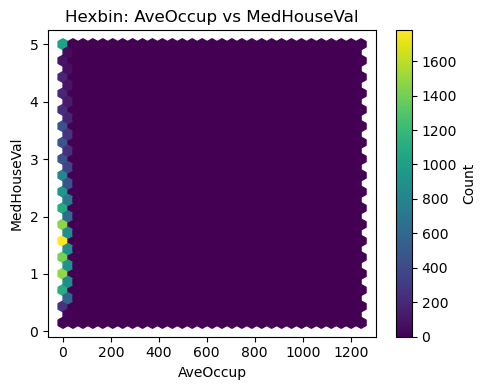

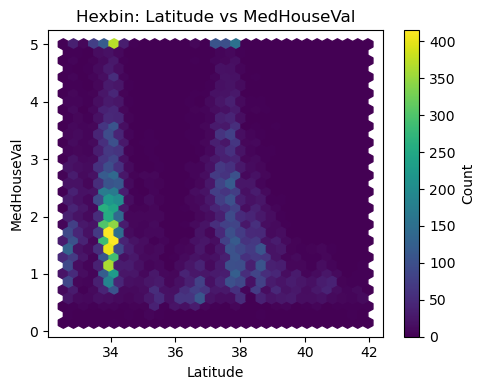

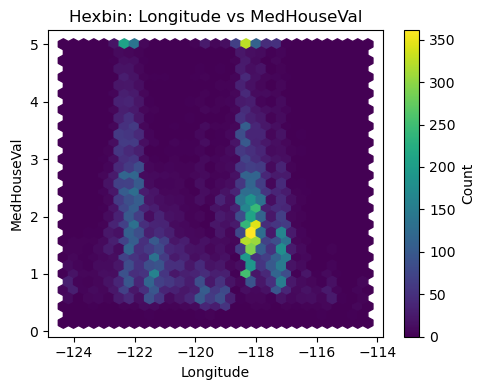

In [93]:
# Features vs Target relationship
for col in features:
    plt.figure(figsize=(5, 4))
    hb = plt.hexbin(
        df[col], df[target],
        gridsize = 30,
        # bins = 'log'
        # mincnt=1
    )
    plt.colorbar(label="Count")
    # plt.colorbar(hb, label="Count")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"Hexbin: {col} vs {target}")
    plt.tight_layout()
    plt.show()

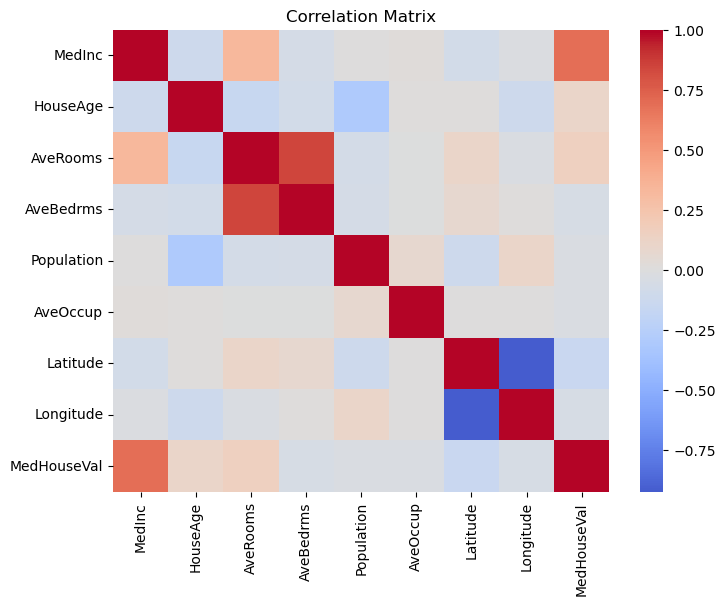

In [59]:
# Correlation matrix (summary insight)
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap="coolwarm", center = 0)
plt.title("Correlation Matrix")
plt.show()


In [64]:
corr 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### AveRooms and AveBedrms and Longitude and Latitude are highly correlated 

# Linear Regression Baseline 

# Multicollinearity Analysis (Variation-Inflation-Factor) 

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

X = df.drop(columns = target)
y = df[target] 

X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.2, random_state = 42
) 

# Scale training features (optional, improves numerical stability for VIF)
# VIF expects numpy array
X_scaled = StandardScaler().fit_transform(X_train)

vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF"] = [
    variance_inflation_factor(X_scaled, i)
    for i in range(X_scaled.shape[1])
]

print(vif.sort_values("VIF", ascending = False))

      Feature       VIF
6    Latitude  9.206134
7   Longitude  8.875984
2    AveRooms  7.917240
3   AveBedrms  6.609200
0      MedInc  2.539815
1    HouseAge  1.237337
4  Population  1.134824
5    AveOccup  1.009733


# Pipeline + Cross Validation (K = 5)  

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

scores = cross_validate(
    pipeline,
    X_train,
    y_train,
    cv=5,
    scoring={"r2": "r2", "rmse": "neg_root_mean_squared_error"}
)

In [82]:
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_validate 
from sklearn.linear_model import LinearRegression


pipeline = Pipeline([ 
    ("scaler", StandardScaler()), 
    ("model", LinearRegression()) 
]) # To prevent data leakage 
scores  = cross_validate( 
    pipeline, 
    X_train, 
    y_train, 
    cv = 5, 
    scoring = {
        "r2": "r2", 
        "rmse": "neg_root_mean_squared_error"
    } 
) 


# scores.keys()
r2_scores = scores["test_r2"]
rmse_scores = -scores["test_rmse"]

print("R²:", r2_scores)
print("RMSE:", rmse_scores)

print("Mean R²:", r2_scores.mean())
print("Mean RMSE:", rmse_scores.mean())

R²: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
RMSE: [0.72115555 0.70872616 0.7214877  0.71266905 0.73859747]
Mean R²: 0.6114839952560994
Mean RMSE: 0.7205271873526421


# Model Assessment 

RMSE: 0.75
r2: 0.5758


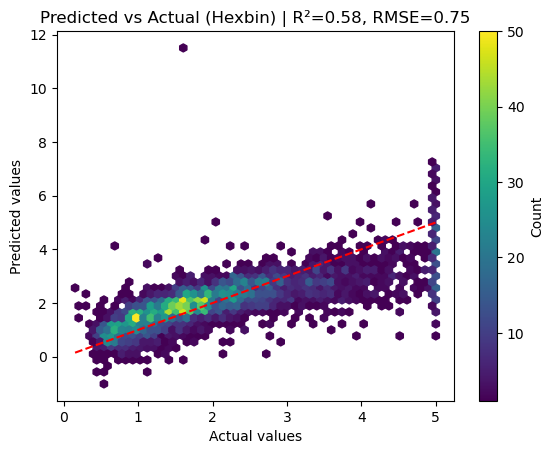

In [95]:
# Fit pipeline on training data 
pipeline.fit(X_train, y_train) 
y_pred = pipeline.predict(X_test) 

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
print(f'RMSE: {rmse_test:.2f}') # On average, the predicted median house value deviates from the true value by about RMSE unit.
print(f'r2: {r2_test:.4f}') # Approximately R2 of the variance in median house value is explained by the model.

plt.hexbin(y_test, y_pred, gridsize = 50, cmap = 'viridis', mincnt = 1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # reference line for perfect prediction 
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual (Hexbin)")
plt.title(f"Predicted vs Actual (Hexbin) | R²={r2_test:.2f}, RMSE={rmse_test:.2f}")
plt.colorbar(label = "Count") # bins = 'log',
plt.show()


The multiple linear regression model achieves:

- RMSE ≈ 0.75 (≈$75k), meaning the average prediction error is 0.75 unit.
- R² ≈ 0.576, indicating that ~57.6% of the variance in median house value is explained by the model.

This suggests that median income and other features capture substantial variation, but there remains unexplained variability due to outliers, skewed features, or unobserved factors.